# `ultraplot` quick demo

`ultraplot` is a high-level wrapper around `matplotlib`, and I've fully adopted it in my workflow.

I particularly value:
- the ease of creating multi-panel figures with shared axes,
- the convenience of generating map plots,
- intuitive colormap manipulation (e.g., making values near zero appear white),
- and the clean, aesthetically pleasing default style.

One of its strengths is that getting started is simple. Just importing `ultraplot` already improves the visual style, and you can continue using familiar `matplotlib` commands. Over time, you’ll likely find yourself naturally shifting to the ultraplot-native API.

A minor downside: `ultraplot` can lag slightly behind the latest `matplotlib` versions. That said, there's a growing and active community working to keep it compatible and up to date.

In [1]:
!python --version

Python 3.12.9


In [2]:
import ultraplot as uplt
import matplotlib as mpl
import xarray as xr
import numpy as np


for pkg in [uplt, xr, np, mpl]:
    print(f"{pkg.__name__}: {pkg.__version__}")

ultraplot: 1.57.2
xarray: 2025.7.1
numpy: 2.3.1
matplotlib: 3.9.4


In [3]:
ds = xr.tutorial.open_dataset("air_temperature").compute()
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

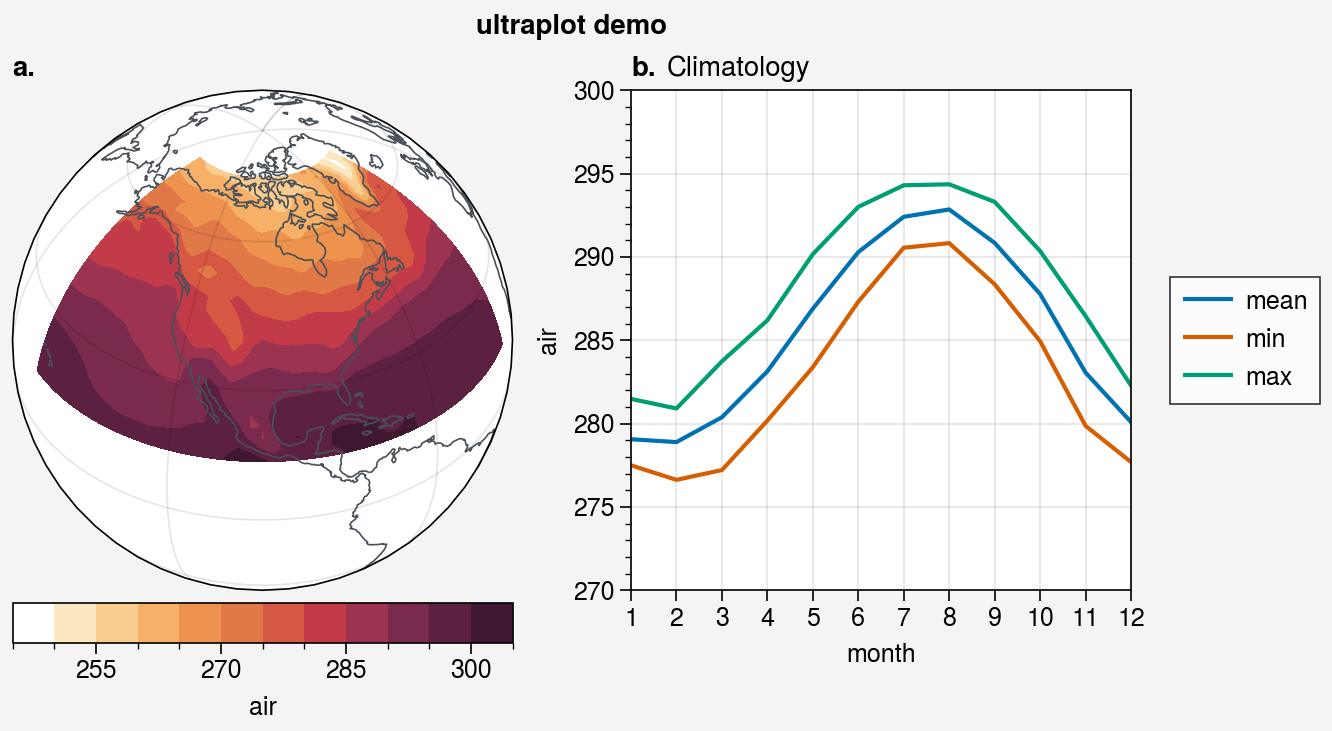

In [4]:
# --- data preparation ---

# contour plot: time mean of air temperature
toplot_contour = ds.air.mean("time")

# line plot: spatial average of air temperature grouped by month
weights = np.cos(np.deg2rad(ds.lat))
air_spatial_avg_grouped_by_month = (
    ds.air.weighted(weights).mean(["lat", "lon"]).groupby("time.month")
)
toplot_lines = {
    "mean": air_spatial_avg_grouped_by_month.mean(),
    "min": air_spatial_avg_grouped_by_month.min(),
    "max": air_spatial_avg_grouped_by_month.max(),
}

# --- plotting ---
fig, axes = uplt.subplots(
    nrows=1,
    ncols=2,
    proj=["nsper", "cartesian"],  # possible to provide a list of projections
    proj_kw={"lon0": -100, "lat0": 40},
)

# I really like how easy it is to plot maps (no transform or similar needed)
axes[0].contourf(toplot_contour, colorbar="b")

for agg_name, statistic in toplot_lines.items():
    axes[1].plot(statistic, label=agg_name)

#  do all formatting in one go
axes[1].format(xlocator=1, xtickminor=False, ylim=(270, 300), ltitle="Climatology")

fig.legend(loc="r", ncols=1)

# easy to add coastlines, etc.
axes.format(coast=True, coastcolor="grey7")

fig.format(abc="a.", suptitle="ultraplot demo")